<a href="https://colab.research.google.com/github/Akib-Alvee/Communication-Engineering-Lab-CSE-366-Assignment/blob/main/Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ \textbf{Md Akibul Islam}$$<br>
$$\textbf{Reg. Number: 2017331049}$$

$\textbf{A program to simulate the digital-digital conversion techniques (Line Coding and Decoding, Block Coding and Decoding Schemes)}$

Digital-to-digital encoding is the representation of digital information by a digital signal. When binary 1s and 0s generated by the computer are translated into a sequence of voltage pulses that can be propagated over a wire, this process is known as digital-to-digital encoding.Two popular techniques are **Line Coding** and **Block Coding**.  

In [ ]:
# Imporing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
sns.set()

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Line Coding

Line coding is the process of converting digital data to digital signals.Line coding converts a sequence of bits to a digital signal. At the sender, digital data are encoded into a digital signal; at the receiver, the digital data are recreated by decoding the digital signal. There are different kinds of schemes in Line coding.They are: <br>
1. Unipolar Schemes<br>
2. Polar Schemes<br>
3. Bipolar Schemes<br>

$\textbf{Unipolar NRZ: Encoding}$

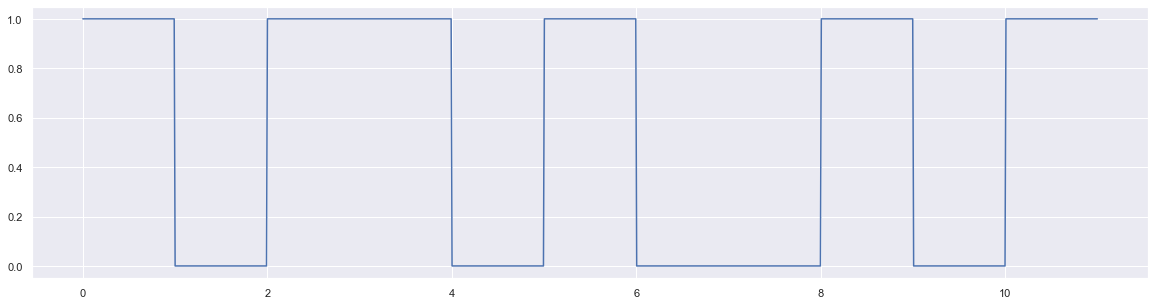

In [ ]:
inputStream = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

timeInterval = 10e-1
T = np.linspace(0,timeInterval,100)
signal = np.array([])
N = len(inputStream)

for i in range (N) :
    temp = inputStream[i]*np.ones(len(T))
    signal = np.append(signal,temp)
t = np.linspace(0,N*timeInterval,len(signal))
plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.show()

$\textbf{Unipolar NRZ: Decoding}$

In [ ]:
decodedOutput = []
bitRate = 1/timeInterval
step = 0
for i in range(len(t)):
  if t[i]*bitRate > step:
    step = step + 1
    decodedOutput.append(int(signal[i]))

print(decodedOutput)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]


$\textbf{Polar NRZ-L: Encoding}$

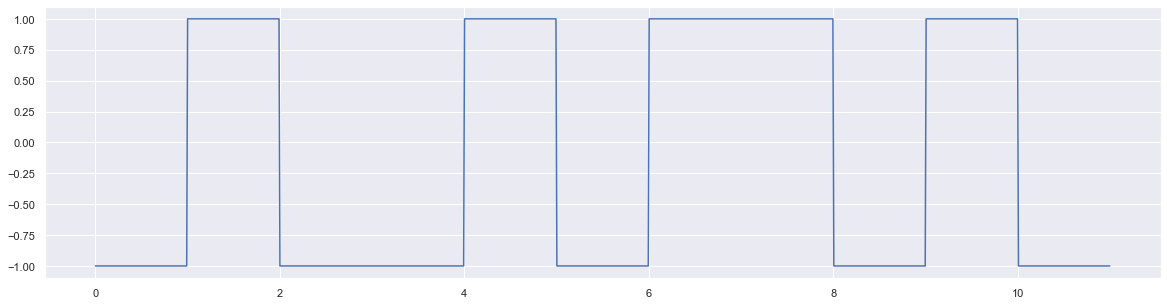

In [ ]:
inputStream = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

timeInterval = 10e-1
T = np.linspace(0,timeInterval,100)
signal = np.array([])
N = len(inputStream)

for i in range (N):
    if inputStream[i] ==0:
        temp = np.ones(len(T))
        signal = np.append(signal,temp)
    else:
        temp = -1*np.ones(len(T))
        signal = np.append(signal,temp)
        
t = np.linspace(0,N*timeInterval,len(signal))
plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.show()


$\textbf{Polar NRZ-L: Decoding}$

In [ ]:
decodedOutput = []
bitRate = 1/timeInterval
step = 0
for i in range(len(t)):
  if t[i]*bitRate > step:
    step = step + 1
    if signal[i]== 1:
        decodedOutput.append(0)
    else:
        decodedOutput.append(1)

print(decodedOutput)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]


$\textbf{Polar NRZ-I: Encoding}$

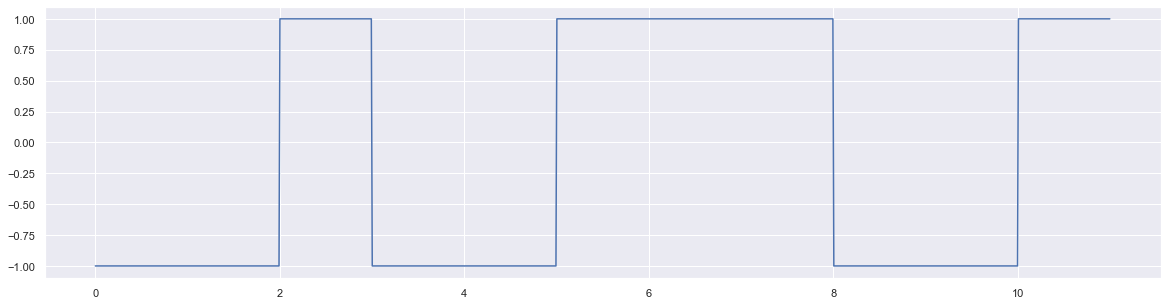

In [ ]:
inputStream = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

timeInterval = 10e-1
T = np.linspace(0,timeInterval,100)
signal = np.array([])
N = len(inputStream)
lastBit = 1
for i in range(N):
  if inputStream[i] == 1:
    temp = (-1) * lastBit * np.ones(len(T))
    lastBit = -lastBit
  else:
    temp = lastBit * np.ones(len(T))
  signal = np.append(signal, temp)
t = np.linspace(0,N*timeInterval,len(signal))
plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.show()

$\textbf{Polar NRZ-I: Decoding}$

In [ ]:
decodedOutput = []
bitRate = 1/timeInterval
step = 0
for i in range(len(t)):
  if t[i]*bitRate > step:
    step = step + 1
    if signal[i] != lastBit:
      decodedOutput.append(1)
      lastBit=-lastBit
    else:
      decodedOutput.append(0)

print(decodedOutput)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]


$\textbf{Polar RZ: Encoding}$

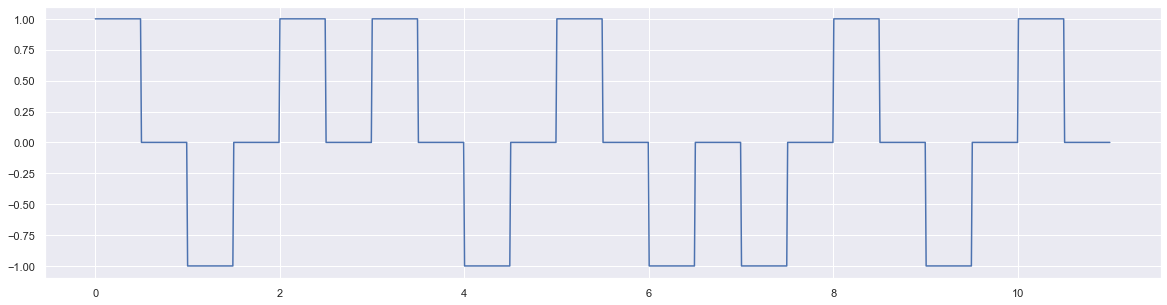

In [ ]:
inputStream = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

timeInterval = 10e-1
T = np.linspace(0,timeInterval,100)
signal = np.array([])
N = len(inputStream)
lastBit = 1
for i in range(N):
  if inputStream[i] == 1:
    temp = np.ones(int(len(T)/2))
    signal = np.append(signal, temp)
    temp = np.zeros(int(len(T)/2))
    signal = np.append(signal, temp)
  else:
    temp = -1*np.ones(int(len(T)/2))
    signal = np.append(signal, temp)
    temp = np.zeros(int(len(T)/2))
    signal = np.append(signal, temp)
t = np.linspace(0,N*timeInterval,len(signal))
plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.show()

$\textbf{Polar Biphase(Manchester): Encoding}$

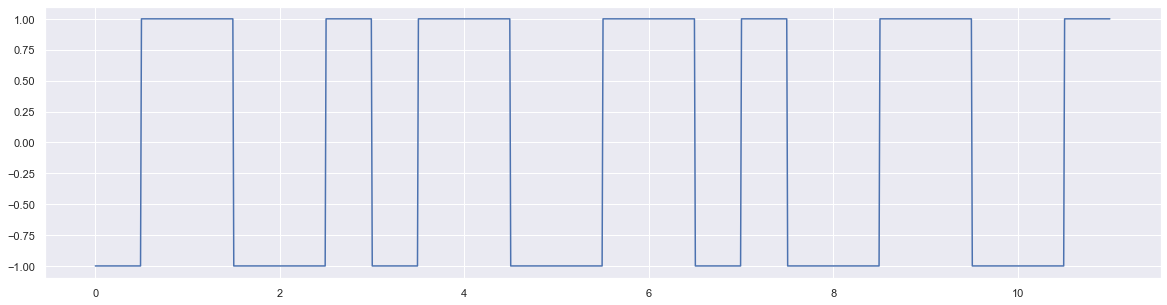

In [ ]:
inputStream = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

timeInterval = 10e-1
T = np.linspace(0,timeInterval,100)
signal = np.array([])
N = len(inputStream)
lastBit = 1
for i in range(N):
  if inputStream[i] == 1:
    temp = -1*np.ones(int(len(T)/2))
    signal = np.append(signal, temp)
    temp = np.ones(int(len(T)/2))
    signal = np.append(signal, temp)
  else:
    temp = np.ones(int(len(T)/2))
    signal = np.append(signal, temp)
    temp = -1*np.ones(int(len(T)/2))
    signal = np.append(signal, temp)
t = np.linspace(0,N*timeInterval,len(signal))
plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.show()

$\textbf{Bipolar (AMI- Alternate Mark Inversion): Encoding}$

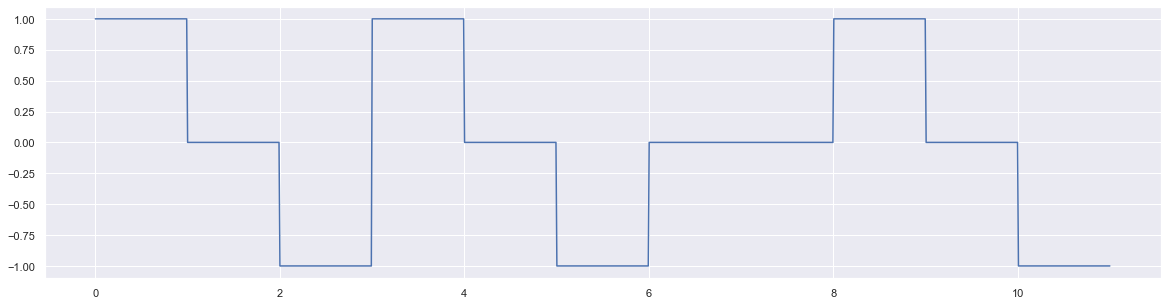

In [ ]:
inputStream = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

timeInterval = 10e-1
T = np.linspace(0,timeInterval,100)
signal = np.array([])
N = len(inputStream)
lastBit = -1
for i in range(N):
  if inputStream[i] == 1:
    temp = (-1) * lastBit * np.ones(len(T))
    lastBit = -lastBit
  else:
    temp = lastBit * np.zeros(len(T))
  signal = np.append(signal, temp)
t = np.linspace(0,N*timeInterval,len(signal))
plt.figure(figsize=(20,5))
plt.plot(t,signal)
plt.show()

# Block Coding

We need redundancy to ensure synchronization and to provide some kind of inherent
error detecting. Block coding can give us this redundancy and improve the performance
of line coding. In general, block coding changes a block of m bits into a block
of n bits, where n is larger than m. Block coding is referred to as an mB/nB encoding
technique.

**Block Coding: Encoding**

In [ ]:
encoding_maps = {
"0000": "01010",
"0001": "10010",
"0010": "10100",
"0011": "10101",
"0100": "11110",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "01001",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",
}
decoding_maps = {
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111",
}

In [ ]:

mB = 4
nB = 5
bits = np.array([0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0])

In [ ]:
if len(bits)%mB != 0:
  extraZeros = np.array(np.zeros(mB-len(bits)%mB),dtype=int)
  bits = np.append(bits,extraZeros)

encodedBits = ""
for i in range(0, len(bits), mB):
  encodedBits += encoding_maps.get("".join(map(str,bits[i:i+mB])))


encodedBits = np.array(list(encodedBits),dtype=int)
print(encodedBits)

[0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 0]


In [ ]:
bits = encodedBits
decodedBits = ""
if len(bits)%nB !=0:
  print("There is an error in receiving code blocks")
for i in range(0, len(bits), nB):
  decodedBits+= decoding_maps.get("".join(map(str,bits[i:i+nB])))

decodedBits = np.array(list(decodedBits),dtype=int)
print(decodedBits)

[0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0]
